In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


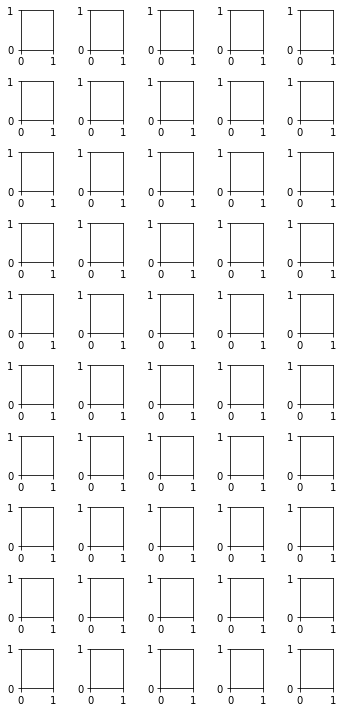

In [5]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

In [6]:
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


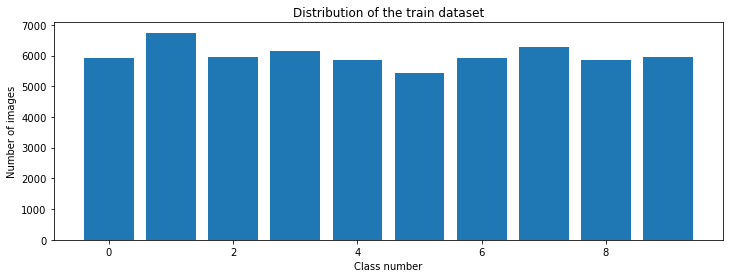

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
#define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [12]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [13]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Epoch 1/10
135/135 [==============================] - 55s 397ms/step - loss: 0.2328 - accuracy: 0.9249 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 2/10
135/135 [==============================] - 47s 352ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 3/10
135/135 [==============================] - 54s 400ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.0440 - val_accuracy: 0.9893
Epoch 4/10
135/135 [==============================] - 45s 332ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0483 - val_accuracy: 0.9865
Epoch 5/10
135/135 [==============================] - 46s 341ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0362 - val_accuracy: 0.9903
Epoch 6/10
135/135 [==============================] - 47s 349ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.0377 - val_accuracy: 0.9907
Epoch 7/10
135/135 [==============================] - 50s 369ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0366 - val_ac

Text(0.5, 0, 'epoch')

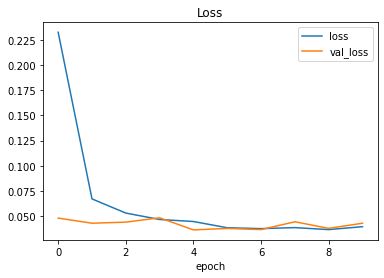

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

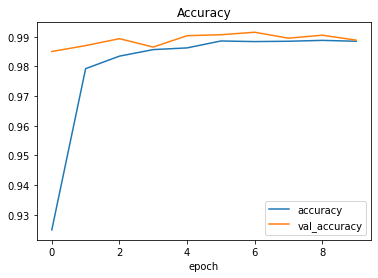

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

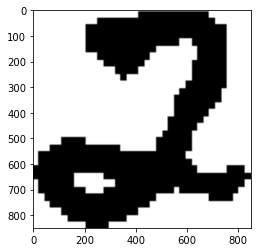

In [16]:
from PIL import Image
img = Image.open(r'digit-2.png')
plt.imshow(img)

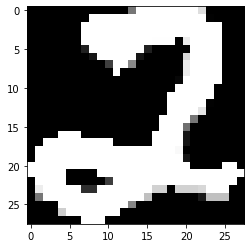

In [17]:
import cv2
img = np.asarray(img)
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [18]:
img = img/255
img = img.reshape(1,28,28,1)

In [19]:
prediction = np.argmax(model.predict(img), axis=-1)
print("Predicted digit: ",str(prediction))

1/1 [==============================] - 0s 287ms/step
Predicted digit:  [2]


In [20]:
score = model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

<class 'list'>
Test Score: 0.034285057336091995
Test Accuracy: 0.9901000261306763


In [21]:
layer1 = Model(inputs=model.layers[0].input,outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input,outputs=model.layers[2].output)
visual_layer1,visual_layer2 = layer1.predict(img),layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 65ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


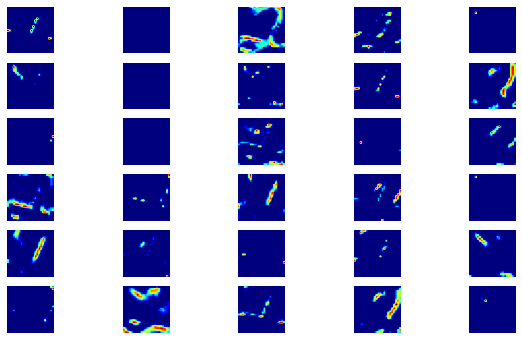

In [22]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0,:,:,i],cmap=plt.get_cmap('jet'))
  plt.axis('off')

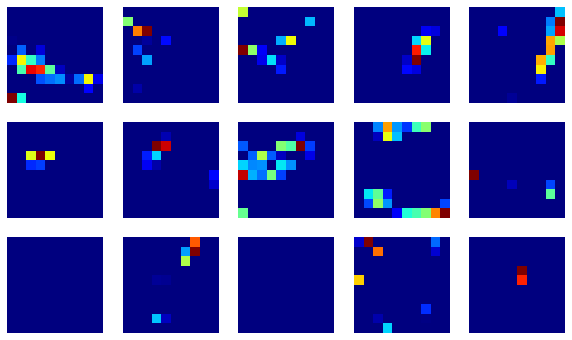

In [23]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0,:,:,i],cmap=plt.get_cmap('jet'))
  plt.axis('off')